# Barcode Preprocessing & Detection

### Acknowledgement: Code was referred from <a href='https://pyimagesearch.com/2014/11/24/detecting-barcodes-images-python-opencv/'>here </a> and experimented for optimal result. Credits to pyimagesearch.com.

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from ipcv import cvlib
from importlib import reload

reload(cvlib)

<module 'ipcv.cvlib' from '/Users/everhett/Projects/python-ws/qr-scanner/ipcv/cvlib.py'>

In [105]:
# Necessary function for comparing visuals.
def display_and_swap(data, curr_img, curr_label, display=True):
    # Display the previous and current side-by-side for visual comparison.
    if display:
        plt.figure(figsize=(14, 12))
        plt.subplot(1, 2, 1)
        plt.imshow(data['prev'], cmap='gray')
        plt.title(data['prev_label'])

        plt.subplot(1, 2, 2)
        plt.imshow(curr_img, cmap='gray')
        plt.title(curr_label)

    # Swap data for subsequent execution.
    data['prev'] = curr_img
    data['prev_label'] = curr_label

    data['curr'] = None
    data['curr_label'] = None

    return data

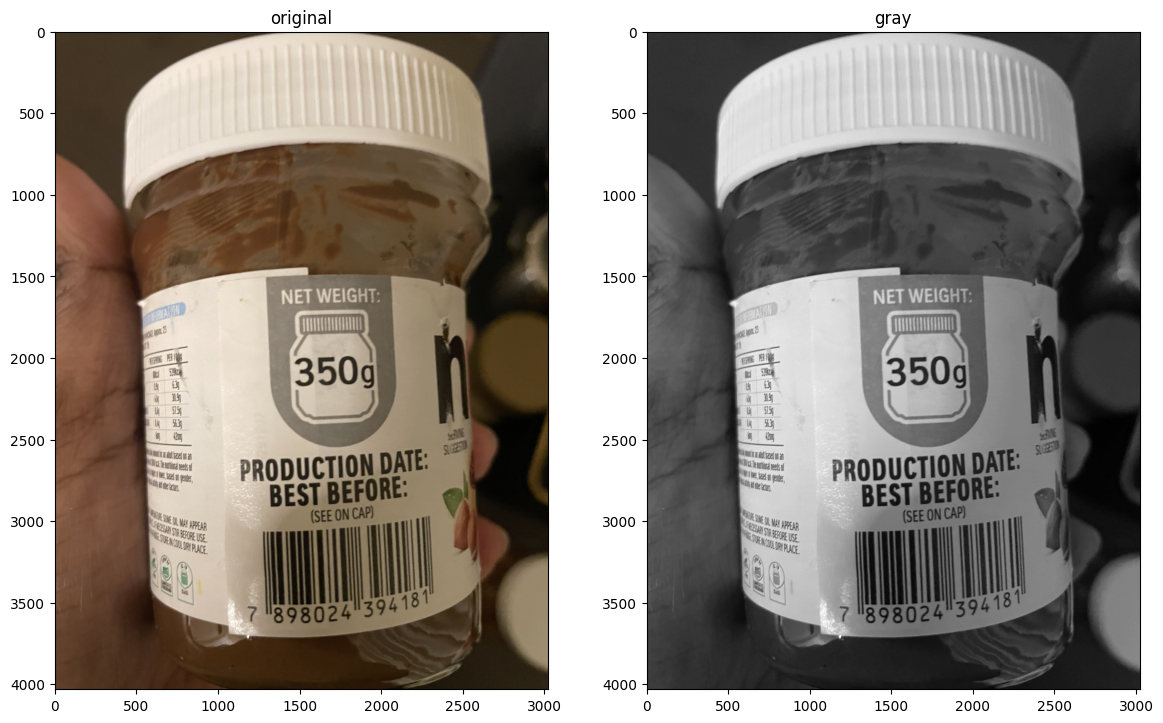

In [110]:
# Load the image as RGB.
# image = ip.load_image('resources/barcode/barcode10.png')
image = cvlib.load_image('resources/barcode/barcode330.JPG')
# plt.imshow(image)

# Convert the image into gray for processing.
label = 'gray'
curr = cvlib.convert_rgb2gray(image)

# Manually set the data once. The swap_and_display() method will be used for subsequent operations.
dat = {}
dat = {'prev': image, 'prev_label': 'original', 'curr': curr, 'curr_label': label}

dat = display_and_swap(dat, curr, label)

In [111]:
dat

{'prev': array([[34, 46, 43, ..., 66, 51, 56],
        [61, 61, 53, ..., 61, 48, 40],
        [64, 60, 61, ..., 50, 50, 48],
        ...,
        [68, 64, 61, ..., 33, 33, 45],
        [62, 63, 61, ..., 41, 33, 43],
        [59, 60, 56, ..., 38, 33, 26]], dtype=uint8),
 'prev_label': 'gray',
 'curr': None,
 'curr_label': None}

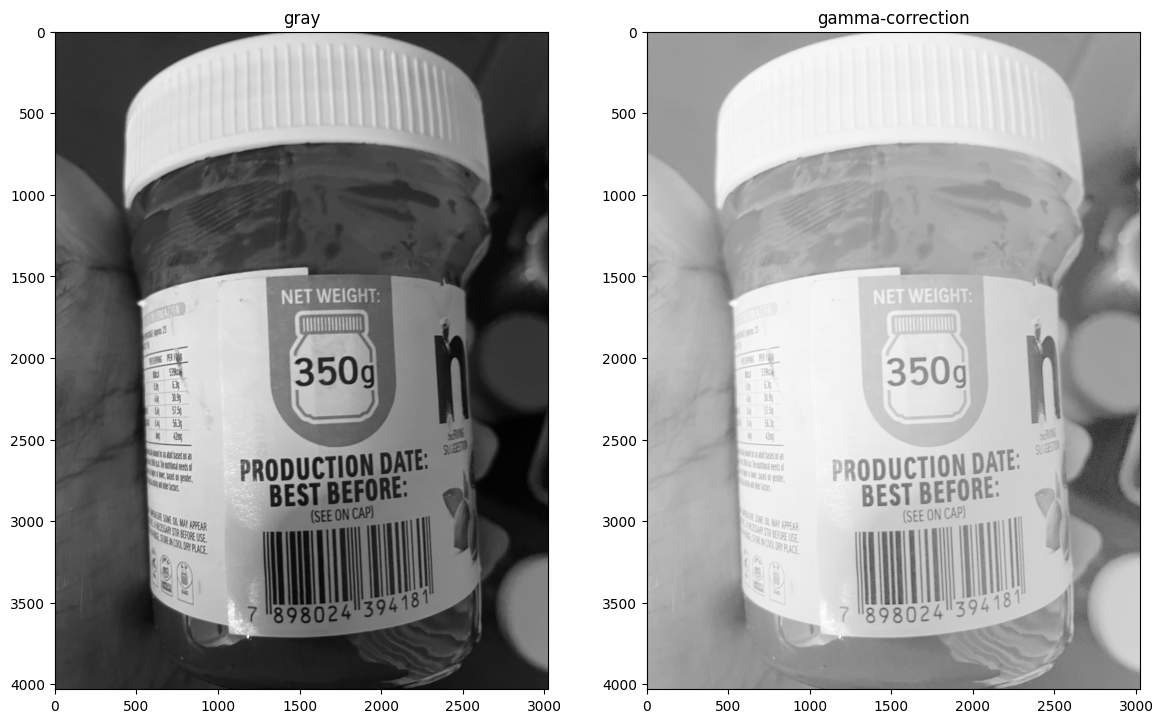

In [112]:
# Correct image's contrast before removing noises.
label = 'gamma-correction'
gamma = 0.3

curr = cvlib.adjust_gamma(dat['prev'], gamma)

# Display and swap for data for next operation.
dat = display_and_swap(dat, curr, label)

In [113]:
# plt.imshow(dat['curr'], cmap='gray')
dat

{'prev': array([[139, 152, 149, ..., 169, 157, 161],
        [166, 166, 159, ..., 166, 154, 146],
        [168, 165, 166, ..., 156, 156, 154],
        ...,
        [171, 168, 166, ..., 138, 138, 151],
        [166, 167, 166, ..., 147, 138, 149],
        [164, 165, 161, ..., 144, 138, 128]], dtype=uint8),
 'prev_label': 'gamma-correction',
 'curr': None,
 'curr_label': None}

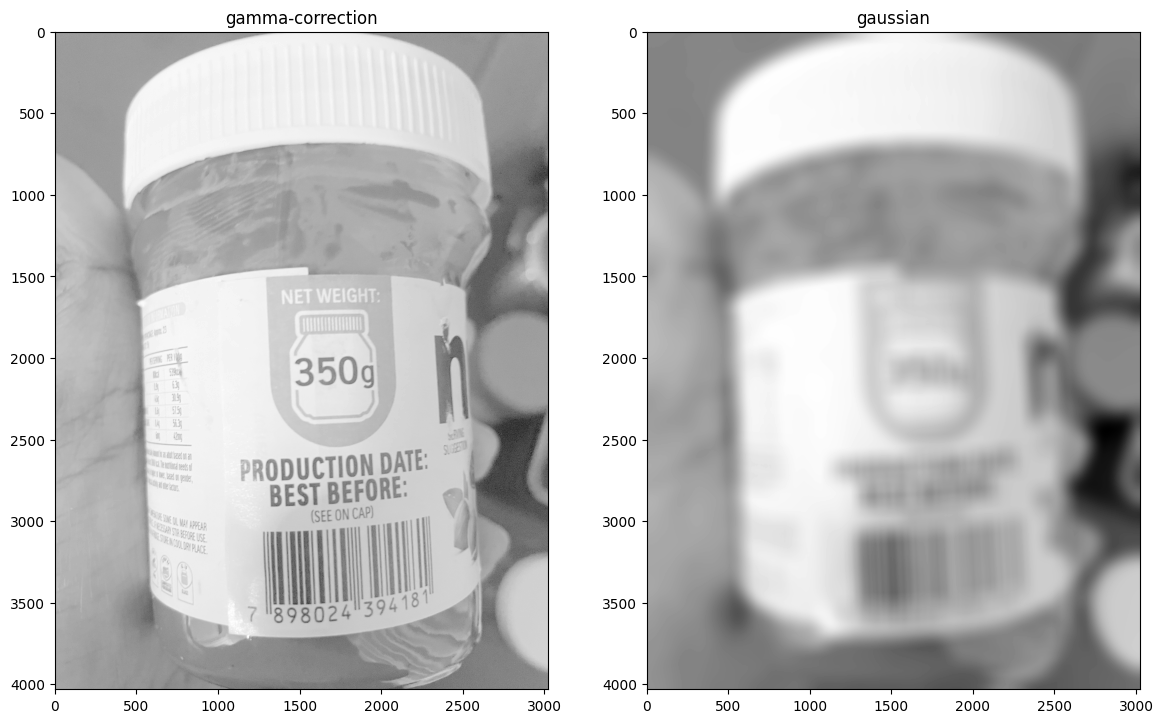

In [114]:
# Gaussian blur to removes noise before processing.
label = 'gaussian'
ksize = (151, 151)
sigma = 51
curr = cvlib.gaussian_blur(dat['prev'], ksize, sigma)

# Display and swap for data for next operation.
dat = display_and_swap(dat, curr, label)

In [ ]:
# Detect edges for processing.
b_operation = 'edges'
b = ip.detect_gradient(prev['a'])
display_and_swap(prev['a'], b, prev['a_operation'], b_operation)

# Set previous-data for next operation after current execution.
prev['a'] = b
prev['a_operation'] = b_operation

In [ ]:
b_operation = 'thresh'
thresh = 128
b = ip.binarize(prev['a'], thresh)
display_and_swap(prev['a'], b, prev['a_operation'], b_operation)

# Set previous-data for next operation after current execution.
prev['a'] = b
prev['a_operation'] = b_operation

In [ ]:
b_operation = 'dilate'
b = ip.dilate(prev['a'], [21, 7], 6)
display_and_swap(prev['a'], b, prev['a_operation'], b_operation)

# # Set previous-data for next operation after current execution.
# prev['a'] = b
# prev['a_operation'] = b_operation

In [ ]:
# # Performs mean blurring on the smoothed image to obtain high-boost enhancement.
# a = b
# ksize = (151, 151)
# sigma = 25
# b = ip.average_blur(a, (59, 59))
# # b = ip.gaussian_blur(a, ksize, sigma)
# display_gray_side_by_side(a, b, 'edges', 'blurred')

In [ ]:
# # Detect edges for processing.
# a = b
# b = ip.detect_gradient(a)
# display_gray_side_by_side(a, b, 'gaussian blurred', 'edges')

In [ ]:
# a = b
# thresh = 100
# b = ip.binarize(a, thresh)
# display_gray_side_by_side(a, b, 'edges', 'binary')

In [ ]:
# a = b
# morphed = ip.dilate(a, [21, 7], 4)
# display_gray_side_by_side(a, b, 'binary', 'dilated')

In [ ]:
# x = a
# a = b
# # Shrink
# new_width = int(x.shape[1] / 6)
# new_height = int(x.shape[0] / 6)
#
# b = ip.resize_image(a, new_width, new_height)
# display_gray_side_by_side(a, b, 'dilated', 'resized')

In [ ]:
# a = b
# b = ip.resize_image(a, x.shape[1], x.shape[0])
# display_gray_side_by_side(a, b, 'resized', 'enlarged')

In [ ]:
# # find the contours in the thresholded image, then sort the contours by their area, keeping only the largest one
# contours, hierarchy = cv2.findContours(b.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# c = sorted(contours, key=cv2.contourArea, reverse=True)[0]
# # compute the rotated bounding box of the largest contour
# rect = cv2.minAreaRect(c)
# box = np.intp(cv2.boxPoints(rect))
# # draw a bounding box rounded the detected barcode and display the image
# cv2.drawContours(image, [box], -1, (0, 255, 0), 3)
# print(f'contour len: {len(contours)}')
# print(f'contour len: {len(c)}')

In [ ]:
# plt.imshow(image)

In [ ]:
# # plt.imshow(box)
# [X, Y, W, H] = cv2.boundingRect(box)
# cropped = image[Y:Y + H, X:X + W]
# plt.imshow(cropped)